In [3]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv(r"C:\Users\aamir\OneDrive\Desktop\CSV Files\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [8]:
df.info()
#There are no missing values in the total_bedrooms attribute dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)
df.isnull().sum()
# The missing values has been handled and now as it can be observed there are no missing or NaN values.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

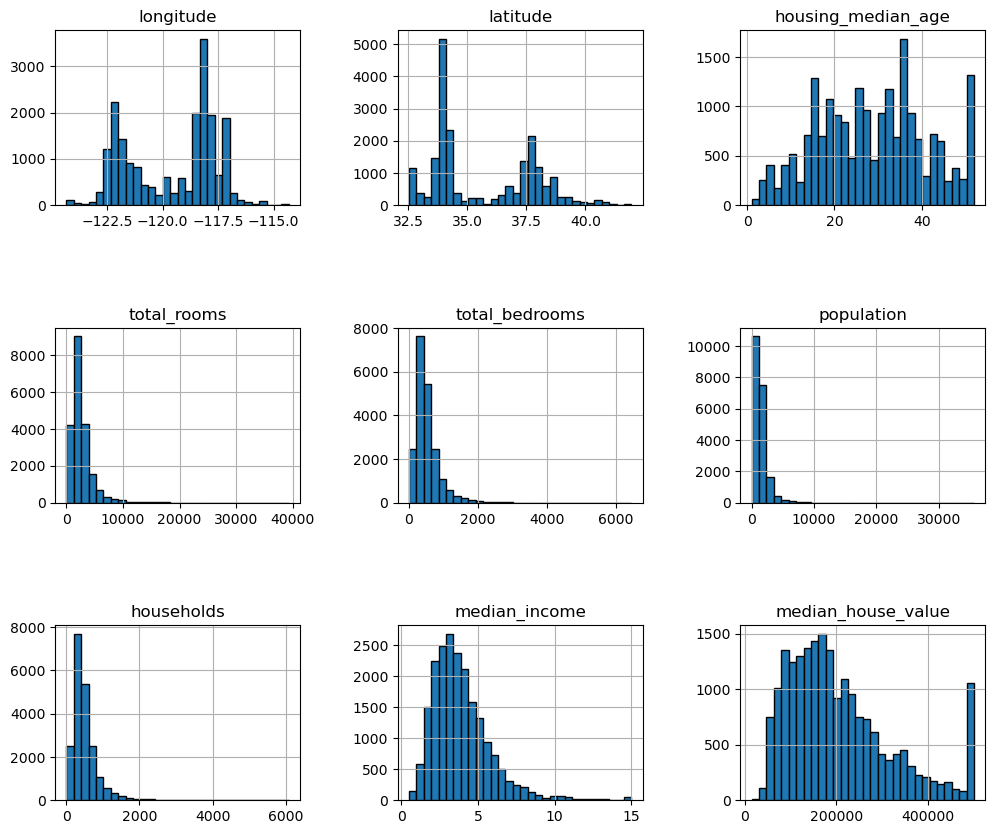

In [10]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
# Here is the histogram plot for all the attributes of california dataset that was picked up by us from kaggle.

In [11]:
attributes_of_interest = ["total_rooms", "total_bedrooms", "households", "population"]
df[attributes_of_interest].describe()
#For each of these features, comparing the max and 75% values, we can see a slight difference. It confirms the intuitions that there are a couple of extreme values.

,total_rooms,total_bedrooms,households,population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,2635.763081,537.870553,499.539680,1425.476744
std,2181.615252,419.266592,382.329753,1132.462122
min,2.000000,1.000000,1.000000,3.000000
25%,1447.750000,297.000000,280.000000,787.000000
50%,2127.000000,438.000000,409.000000,1166.000000
75%,3148.000000,643.250000,605.000000,1725.000000
max,39320.000000,6445.000000,6082.000000,35682.000000


C:\Users\aamir\AppData\Local\Temp\ipykernel_2468\3087970650.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['longitude'])


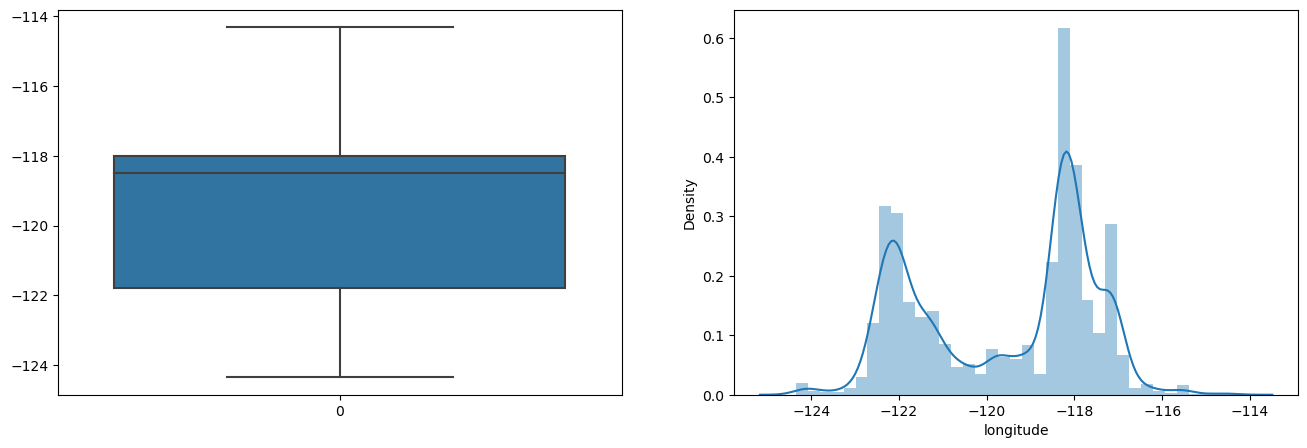

In [12]:
#Outlier Detection:-
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['longitude'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['longitude'])

C:\Users\aamir\AppData\Local\Temp\ipykernel_2468\137099003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['latitude'])


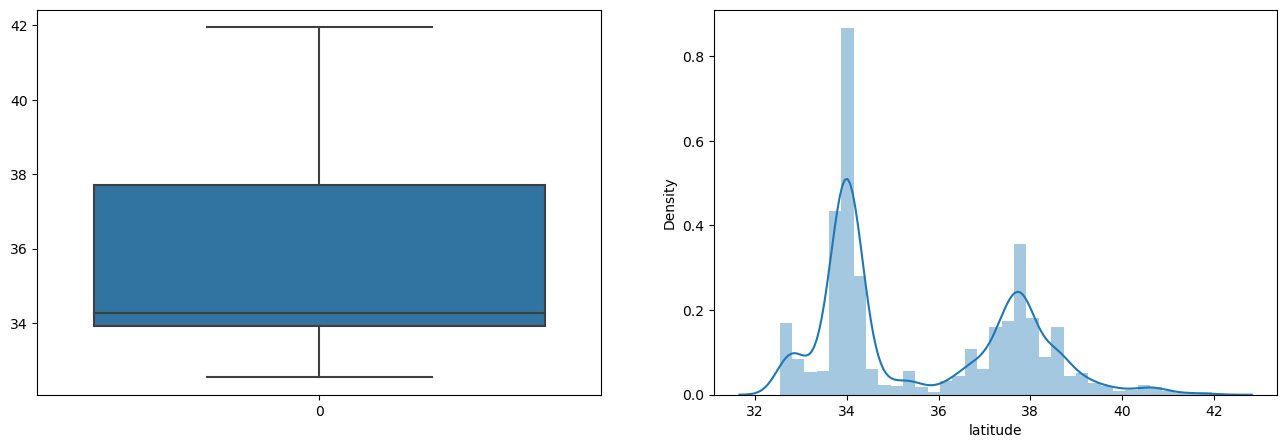

In [13]:
#Box Plot Technique for Outliers:-
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['latitude'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['latitude'])

C:\Users\aamir\AppData\Local\Temp\ipykernel_2468\1735533343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['total_bedrooms'])


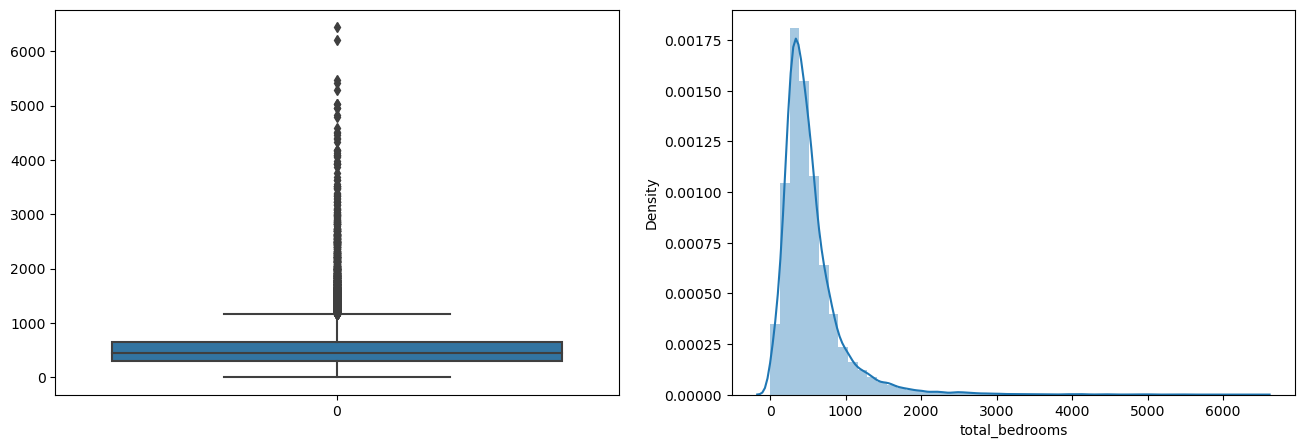

In [14]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['total_bedrooms'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['total_bedrooms'])

C:\Users\aamir\AppData\Local\Temp\ipykernel_2468\2186852716.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['median_income'])


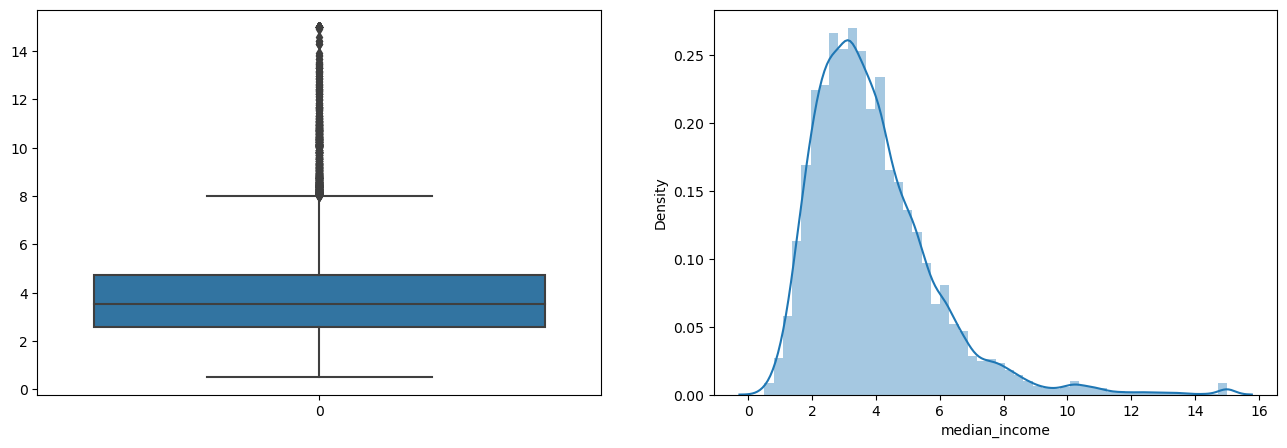

In [15]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['median_income'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['median_income'])

C:\Users\aamir\AppData\Local\Temp\ipykernel_2468\799493198.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['median_house_value'])


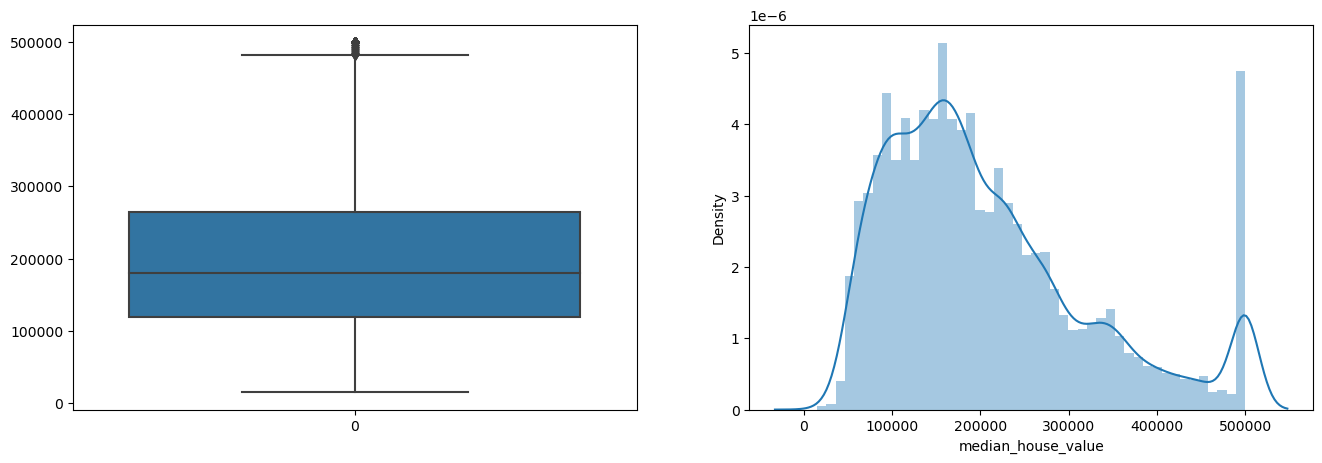

In [16]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['median_house_value'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['median_house_value'])

In [18]:
print(df.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [19]:
df.drop('ocean_proximity',axis=1,inplace=True)

In [20]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

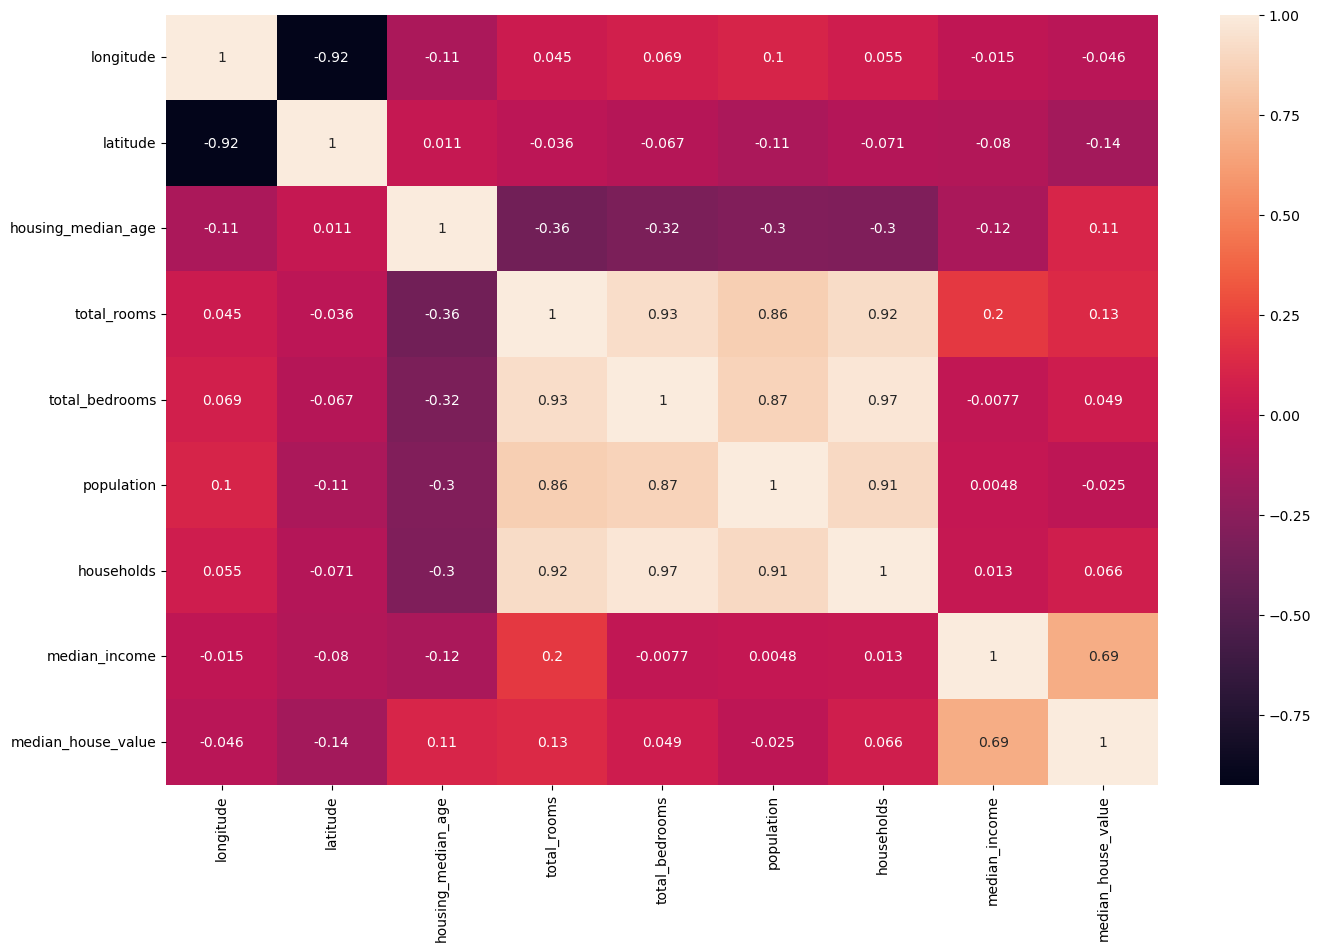

In [21]:
#Heatmap Representation of Correlated variables.
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)

In [22]:
#Determination of values a and b from the provided distance formula where a = Direction Vector; b = Point on a line.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Function to compute distance from a point to a line
def distance_to_line(p, a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(np.dot(np.identity(2) - np.outer(a, a), p - b))

# Function to minimize total squared distance from houses to line
def minimize_total_squared_distance(houses, a, b):
    total_squared_distance = sum(distance_to_line(house, a, b)**2 for house in houses)
    return total_squared_distance

# Function to find best-fitted line for a cluster
def find_best_fitted_line(houses_cluster):
    # Extract latitude and longitude separately
    latitudes = houses_cluster[:, 0]  # Latitude
    longitudes = houses_cluster[:, 1]  # Longitude
    
    # No need for optimization in this function, simply return latitude and longitude
    return latitudes, longitudes

# Main algorithm
def construct_gas_pipeline(houses, num_clusters):
    # Cluster houses into groups
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_indices = kmeans.fit_predict(houses)
    
    # Initialize lists to store lines for each cluster
    lines = []
    
    # Find best-fitted line for each cluster
    for cluster_id in range(num_clusters):
        houses_cluster = houses[cluster_indices == cluster_id]
        a, b = find_best_fitted_line(houses_cluster)
        lines.append((a, b))
    
    # Combine lines obtained for each cluster to form a single line
    combined_a = np.mean(np.concatenate([line[0] for line in lines]))
    combined_b = np.mean(np.concatenate([line[1] for line in lines]))
    
    return combined_a, combined_b

# Preprocessing: Extract latitude and longitude
houses = df[['latitude', 'longitude']].values

# Example usage
num_clusters = 2  # Number of clusters
a, b = construct_gas_pipeline(houses, num_clusters)
print("Direction vector (a- Latitude):", a)
print("Point on line (b- Longitude):", b)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Direction vector (a- Latitude): 35.63186143410853
Point on line (b- Longitude): -119.56970445736435


In [23]:
#Objective:1
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Function to take user input for longitude and latitude
def get_user_coordinates():
    longitude = float(input("Enter longitude: "))
    latitude = float(input("Enter latitude: "))
    return longitude, latitude

# Function to calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)*2 + (y2 - y1)*2)

# Function to find the closest cluster to the user's input coordinates
def find_closest_cluster(user_longitude, user_latitude, centroids):
    min_distance = float('inf')
    closest_cluster = None
    for i, centroid in enumerate(centroids):
        distance = calculate_distance(user_longitude, user_latitude, centroid[0], centroid[1])
        if distance < min_distance:
            min_distance = distance
            closest_cluster = i
    return closest_cluster

# Take user input for number of clusters (k)
k = int(input("Enter the number of clusters (k): "))

# Extracting longitude and latitude columns
X = df[['longitude', 'latitude']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Obtaining centroids
centroids = kmeans.cluster_centers_

# Taking user input for longitude and latitude
user_longitude, user_latitude = get_user_coordinates()

# Finding the closest cluster to the user's input coordinates
closest_cluster = find_closest_cluster(user_longitude, user_latitude, centroids)

# Obtaining data points in the closest cluster
closest_cluster_df = df[kmeans.labels_ == closest_cluster]

# Train a linear regression model to predict median_house_value
X_cluster = closest_cluster_df[['longitude', 'latitude']]
y_cluster = closest_cluster_df['median_house_value']

regression_model = LinearRegression()
regression_model.fit(X_cluster, y_cluster)

# Predicting median_house_value for the specific longitude and latitude
predicted_median_house_value = regression_model.predict([[user_longitude, user_latitude]])

print("Predicted median house value:", predicted_median_house_value[0])

Enter the number of clusters (k): 2


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter longitude: -122.5
Enter latitude: 37.5
Predicted median house value: 263168.19626125693


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


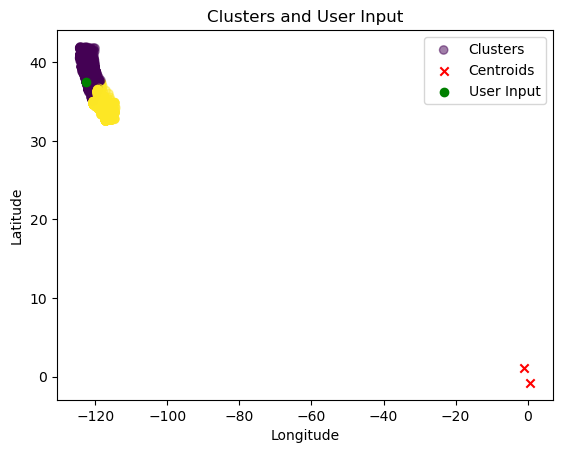

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.scatter(df['longitude'], df['latitude'], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Clusters')
# Ploting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
# Ploting user input
plt.scatter(user_longitude, user_latitude, marker='o', color='green', label='User Input')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters and User Input')
plt.legend()
plt.show()
#Outliers: Possibility is that there are outliers in the dataset.If there are outliers in a cluster, the centroid may be pulled towards them, causing it to be located outside the main cluster.
#Dimensionality: In higher-dimensional spaces, the concept of a centroid becomes less intuitive, and the centroid may appear to be outside the cluster even if it is technically within the cluster in some dimensions.

In [25]:
#obj1:- Silhouette Score
from sklearn.metrics import silhouette_score

# Assuming 'X_scaled' contains the scaled feature matrix

# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Obtaining cluster labels
cluster_labels = kmeans.labels_

# Computing Silhouette Score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_score_value)
#A higher score indicates better clustering.

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7549172189258013


In [26]:
#Objective:2
import numpy as np
from sklearn.cluster import KMeans
from scipy.optimize import minimize

def distance_to_line(point, slope, intercept):
    x, y = point
    return abs(slope * x - y + intercept) / np.sqrt(slope**2 + 1)

def max_distance_to_line(houses, slope, intercept):
    distances = [distance_to_line(point, slope, intercept) for point in houses]
    return np.max(distances)

def objective(parameters, X):
    slope, intercept = parameters
    return max_distance_to_line(X, slope, intercept)

def compute_fair_line_kmeans(X, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Initialize minimized maximum distance
    min_max_distance = float('inf')
    optimal_parameters = None

    # For each cluster, find the line parameters that minimize the maximum distance
    for i in range(k):
        cluster_houses = X[labels == i]
        result = minimize(objective, [0, 0], args=(cluster_houses,), method='BFGS')
        slope, intercept = result.x
        max_distance = max_distance_to_line(cluster_houses, slope, intercept)
        if max_distance < min_max_distance:
            min_max_distance = max_distance
            optimal_parameters = result.x

    return optimal_parameters, min_max_distance

X = df[['latitude', 'longitude']].values
k = 2  # Number of clusters
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(X, k)
print("Optimal slope and intercept:", optimal_parameters)
print("Minimized maximum distance to any house:", minimized_max_distance)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal slope and intercept: [-3.36755043  0.06088739]
Minimized maximum distance to any house: 2.145561378154791


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

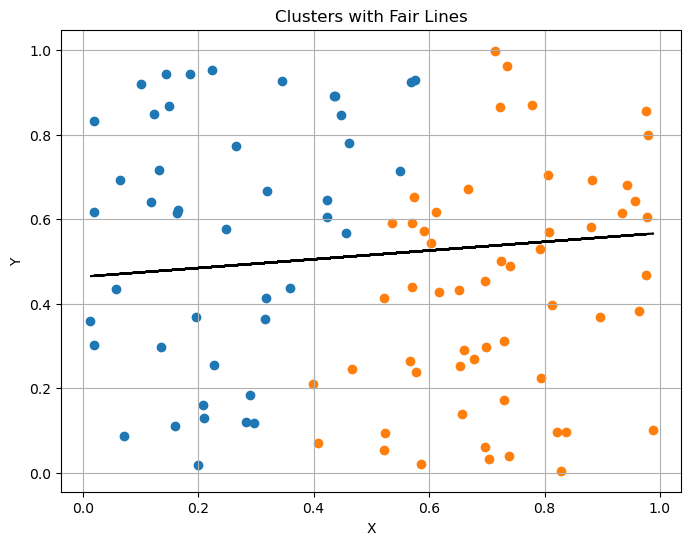

In [27]:
import matplotlib.pyplot as plt

def plot_clusters_with_fair_line(houses, labels, fair_lines):
    plt.figure(figsize=(8, 6))

    # Plot data points colored by cluster
    for i in range(len(np.unique(labels))):
        cluster_houses = houses[labels == i]
        plt.scatter(cluster_houses[:, 0], cluster_houses[:, 1], label=f'Cluster {i+1}')

    # Plot fair lines for each cluster
    for i, line_params in enumerate(fair_lines):
        slope, intercept = line_params
        plt.plot(houses[:, 0], slope * houses[:, 0] + intercept, linestyle='--', color='black',
                 label=f'Fair line for Cluster {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters with Fair Lines')
    plt.grid(True)
    plt.show()

# Generating synthetic data
np.random.seed(0)
data = np.random.rand(100, 2)

# Computing KMeans and fair lines
k = 2
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(data, k)

# Ploting clusters with fair lines
plot_clusters_with_fair_line(data, KMeans(n_clusters=k, random_state=42).fit(data).labels_, [optimal_parameters])

In [30]:
#Obj:2 Silhouette Score
from sklearn.metrics import silhouette_score

X = df[['latitude', 'longitude']].values
k = 2  # Number of clusters
optimal_parameters, minimized_max_distance = compute_fair_line_kmeans(X, k)

# Performing K-means clustering with the obtained optimal parameters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Computing silhouette score
silhouette_score_value = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score_value)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7562423686755555


In [37]:
#Objective:3
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Defining the distance function
def distance_to_line(point, direction, line_point):
    I = np.eye(2)
    a = np.array(direction)
    b = np.array(line_point)
    return np.linalg.norm((I - np.outer(a, a)).dot(point - b))

# Gradient of the cost function with respect to direction vector 'a' and line point 'b'
def gradient_cost_function(cluster_coordinates, direction, line_point):
    grad_direction = np.zeros(2)
    grad_point = np.zeros(2)

    for point in cluster_coordinates:
        point = np.array(point)
        grad_direction += 2 * np.dot((np.eye(2) - np.outer(direction, direction)), point - line_point)
        grad_point += 2 * np.dot(direction, point - line_point) * direction

    return grad_direction, grad_point

# Gradient descent optimization to minimize the cost function
def gradient_descent(cluster_coordinates, initial_direction, initial_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-5):
    direction = initial_direction
    point = initial_point

    for i in range(max_iterations):
        grad_direction, grad_point = gradient_cost_function(cluster_coordinates, direction, point)
        new_direction = direction - learning_rate * grad_direction
        new_point = point - learning_rate * grad_point

        if np.linalg.norm(new_direction - direction) < tolerance and np.linalg.norm(new_point - point) < tolerance:
            break

        direction = new_direction
        point = new_point

    return direction, point

# Loading the dataset again
data = pd.read_csv(r'C:\Users\aamir\OneDrive\Desktop\CSV Files\housing.csv')

# Extracting latitude and longitude features
coordinates = data[['longitude', 'latitude']].values

# Defining the number of clusters (k)
k = 3  # You can adjust this number based on your requirements

# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)

# Initializing variables to store the lines and total cost
lines = []
total_cost = 0

# Iterating over clusters
for cluster_id, cluster_data in data.groupby('cluster'):
    # Extracting coordinates of houses in the cluster
    cluster_coordinates = cluster_data[['longitude', 'latitude']].values

    # Computing the initial line parameters (mean as line point, random direction)
    initial_direction = np.random.rand(2)
    initial_point = np.mean(cluster_coordinates, axis=0)

    # Optimizing the line parameters using gradient descent
    direction, point = gradient_descent(cluster_coordinates, initial_direction, initial_point)

    # Computing the total cost
    for index, row in cluster_data.iterrows():
        total_cost += distance_to_line(row[['longitude', 'latitude']].values, direction, point)

    # Storing the optimized line parameters
    lines.append({'direction': direction, 'point': point})

# Returning the set of efficient lines and total cost
print("Efficient Lines:")
for idx, line in enumerate(lines):
    print(f"Line {idx + 1}: Direction = {line['direction']}, Point = {line['point']}")
print("Total Cost:", total_cost)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Efficient Lines:
Line 1: Direction = [0.90404439 0.69002502], Point = [-121.93029495   38.11365147]
Line 2: Direction = [0.69962205 0.3277204 ], Point = [-117.88493836   33.82435098]
Line 3: Direction = [0.75677864 0.63606106], Point = [-119.71000542   35.99619848]
Total Cost: 11511.599397055554


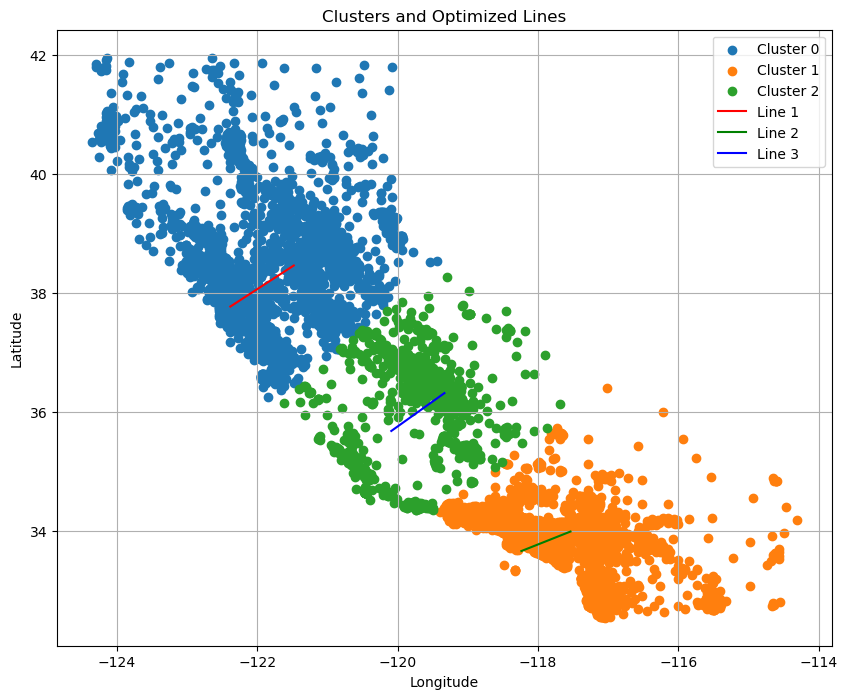

In [40]:
import matplotlib.pyplot as plt

# Ploting the clusters
plt.figure(figsize=(10, 8))

for cluster_id, cluster_data in data.groupby('cluster'):
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_id}')

# Ploting the lines with different colors
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # List of colors
for idx, line in enumerate(lines):
    direction = line['direction']
    point = line['point']
    
    x_values = [point[0] - 0.5 * direction[0], point[0] + 0.5 * direction[0]]
    y_values = [point[1] - 0.5 * direction[1], point[1] + 0.5 * direction[1]]
    
    plt.plot(x_values, y_values, label=f'Line {idx + 1}', color=colors[idx % len(colors)])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters and Optimized Lines')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
#Obj:3 Silhouette Score
from sklearn.metrics import silhouette_score

# Example usage
coordinates = data[['longitude', 'latitude']].values
k = 3  # Number of clusters

# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(coordinates)

# Computing Silhouette Score
silhouette_score_value = silhouette_score(coordinates, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6471818705345762
